In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.sparse as sparse
import scipy.sparse.linalg as linalg
from scipy.stats import norm

In [2]:
def call_price(S,K,r,T,sigma):
    d1=(np.log(S/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2=(np.log(S/K)+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    c = S*norm.cdf(d1)-K*norm.cdf(d2)*np.exp(-r*T)
    return c
def put_price(S,K,r,T,sigma):
    d1=(np.log(S/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2=(np.log(S/K)+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    p = K*np.exp(-r*T)*(1-norm.cdf(d2))-S*(1-norm.cdf(d1))
    return p
def X(S,k,t):
    return np.log(S/k)+(r-0.5*sigma**2)*t
def S(X,k,t):
    return k*np.exp(X-(r-0.5*sigma**2)*t)

In [97]:
#Solving p_t = 0.5(Dp)_xx where u,D are supposed to be constant inputs, can be later generalized to functionals
def solve_fpe(m, n, T,sigma, a, b,p_0,method="fixed"):
    """
    This function solves a constant coefficient 1D fpe with drag coefficient u and diffusion coefficient D using explicit FTCS method.
    The spatial interval is [a,b] and the time range is [0,T]
    m grids and n steps are used for spatial and time discretizations.
    The funciton returns the end time numerical solution p_cur and the spatial array x.
    """
    D = sigma**2
    x = np.linspace(a, b, m+1)
    delta_x = float(b - a) / m
    delta_t = float(T) / n
    mean = (a + b)/2.0
    t_0 = 1.0 / D
    t =0.0
    p_cur = p_0.copy()
    y_upper = float(max(p_0)+0.01)
    plt.plot(x, p_cur, label='t = '+str(t))
    for j in range(1,n+1):
        
        t = j*delta_t
        p_old = p_cur.copy()
        for i in range(1,m):
            #centered difference
            p_cur[i] = delta_t*D*0.5*(p_old[i-1] - 2*p_old[i] + p_old[i+1])/delta_x**2 + p_old[i]
        if method=="fixed":
            p_cur[0] = p_old[0]
            p_cur[-1] = p_old[-1]
        elif method=="1st order":
            p_cur[0] = 2*p_cur[1]-p_cur[2]
            p_cur[-1] = 2*p_cur[-2]-p_cur[-3]
        elif method=='zero':
            for i in range(len(p_cur)):
                if S(x[i],K,t)<=H:
                    p_cur[i]=0
                    
            p_cur[0] = 0
            s = S(x[-1],K,t)
            p_cur[-1] =call_price(s,K,r,t,sigma)/np.exp(-r*t)
        else:
            p_cur[0] = p_cur[1]
            p_cur[-1] = p_cur[-2]
        if j%(n/10) == 0:
            
            plt.plot(x, p_cur, label='t = '+str(t))
            #print "Time "+str(t)+" probability total = "+str(sum(p_cur)*delta_x)
    plt.xlabel("x")
    plt.xlim(a,b)
    plt.ylabel("u(x)")
    plt.ylim(0,y_upper)
    plt.legend(loc='upper left')
    plt.title("FPE with Vol="+str(D)+" in "+str([a,b]))
    plt.show()
   
    return p_cur, x
def solve_fpe_back(m, n, T,sigma, a, b,p_0,method="fixed"):
    """
    This function solves a constant coefficient 1D fpe with drag coefficient u and diffusion coefficient D using explicit FTCS method.
    The spatial interval is [a,b] and the time range is [0,T]
    m grids and n steps are used for spatial and time discretizations.
    The funciton returns the end time numerical solution p_cur and the spatial array x.
    """
    D = -sigma**2
    x = np.linspace(a, b, m+1)
    delta_x = float(b - a) / m
    delta_t = float(T) / n
    mean = (a + b)/2.0
    t_0 = 1.0 / D
    t =0.0
    p_cur = p_0.copy()
    plt.plot(x, p_cur, label='t = '+str(t))
    for j in range(1,n+1):
        
        t = j*delta_t
        p_old = p_cur.copy()
        for i in range(1,m):
            #centered difference
            p_cur[i] = delta_t*D*0.5*(p_old[i-1] - 2*p_old[i] + p_old[i+1])/delta_x**2 + p_old[i]
        if method=="fixed":
            p_cur[0] = p_old[0]
            p_cur[-1] = p_old[-1]
        elif method=="1st order":
            p_cur[0] = 2*p_cur[1]-p_cur[2]
            p_cur[-1] = 2*p_cur[-2]-p_cur[-3]
        else:
            p_cur[0] = p_cur[1]
            p_cur[-1] = p_cur[-2]
        if j%(n/10) == 0:
            
            plt.plot(x, p_cur, label='t = '+str(t))
            print "Time "+str(t)+" probability total = "+str(sum(p_cur)*delta_x)
    y_upper = float(max(p_cur)+0.01)
    plt.xlabel("x")
    plt.xlim(a,b)
    plt.ylabel("u(x)")
    plt.ylim(0,y_upper)
    plt.legend(loc='upper left')
    plt.title("FPE with Vol="+str(D)+" in "+str([a,b]))
    plt.show()
   
    return p_cur, x
def solve_fpe_back_implicit(m, n, T,sigma, a, b,p_0):
    """
    This function solves a constant coefficient 1D fpe with drag coefficient u and diffusion coefficient D using explicit FTCS method.
    The spatial interval is [a,b] and the time range is [0,T]
    m grids and n steps are used for spatial and time discretizations.
    The funciton returns the end time numerical solution p_cur and the spatial array x.
    """
    D = -sigma**2
    x = np.linspace(a, b, m+1)
    delta_x = float(b - a) / m
    delta_t = float(T) / n
    mean = (a + b)/2.0
    t_0 = 1.0 / D
    t =0.0
    p_cur = p_0.copy()
    y_upper = float(max(p_0)+0.01)
    plt.plot(x, p_cur, label='t = '+str(t))
    plt.ylim((0,2))
    r = D*0.5 * delta_t / (delta_x**2)
    
    for j in range(1,n+1):
        
        t = j*delta_t
        p_old = p_cur.copy()
        for i in range(1,m):
            #centered difference
            p_cur[i] = (delta_t*D*0.5*(p_old[i-1]+ p_old[i+1])/delta_x**2 + p_old[i])/(1+2*r)
        p_cur[0] = p_cur[1]
        p_cur[-1] = p_cur[-2]
        if j%(n/10) == 0:
            
            plt.plot(x, p_cur, label='t = '+str(t))
            print "Time "+str(t)+" probability total = "+str(sum(p_cur)*delta_x)
    plt.xlabel("x")
    plt.xlim(a,b)
    plt.ylabel("u(x)")
    plt.ylim(0,y_upper)
    plt.legend(loc='upper left')
    plt.title("FPE with Vol="+str(D)+" in "+str([a,b]))
    plt.show()
   
    return p_cur, x

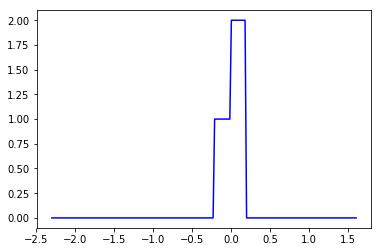

In [80]:
#BS test 1
r = 0.05
T = 1.0
K = 100.0
dK = 20
d = [1.0,1.0,-2.0]
sigma = 0.1
S_a = 10
S_b = 500
m=200
n=1000
x_a = X(S_a,K,0)
x_b = X(S_b,K,0)
xx = np.linspace(x_a, x_b, m+1)
x_k = X(K-dK,K,0)
x_k1 = X(K,K,0)
x_k2 = X(K+dK,K,0)
u_0 = []
for x in xx:
    v = 0.0
    if x>=x_k:
        v+=d[0]
    if x>=x_k1:
        v+=d[1]
    if x>=x_k2:
        v+=d[2]
    u_0.append(v)
u_0 = np.array(u_0)
plt.plot(xx,u_0,'b')

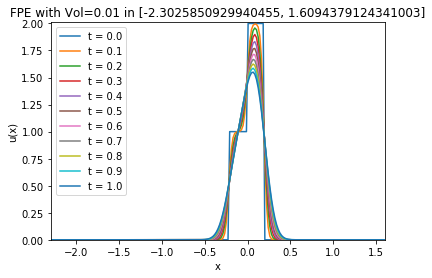

In [81]:
p_t,xx = solve_fpe(m,n,T,sigma,x_a,x_b,u_0)

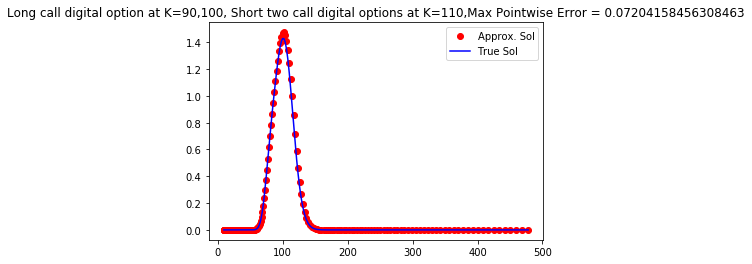

In [82]:
V_t = p_t*np.exp(-r*T)
S_t = np.array([K*np.exp(x-(r-0.5*sigma**2)*T) for x in xx])
true_V = d[0]*np.array([np.exp(-r*T)*norm.cdf((np.log(s/(K-dK))+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))) for s in S_t])
true_V+=d[1]*np.array([np.exp(-r*T)*norm.cdf((np.log(s/(K))+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))) for s in S_t])
true_V+=d[2]*np.array([np.exp(-r*T)*norm.cdf((np.log(s/(K+dK))+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))) for s in S_t])
plt.plot(S_t,V_t,'ro',label='Approx. Sol')
plt.plot(S_t, true_V,'b',label='True Sol')
plt.title('Long call digital option at K=90,100, Short two call digital options at K=110,Max Pointwise Error = '+str(max(abs(true_V-V_t))))
plt.legend()

Time 0.1 probability total = 0.6063635658413626
Time 0.2 probability total = 0.6063635658413628
Time 0.3 probability total = 0.6063635658413626
Time 0.4 probability total = 0.6063635658413622
Time 0.5 probability total = 0.6063635658413624
Time 0.6 probability total = 0.6063635658413626
Time 0.7 probability total = 0.6063635658413626
Time 0.8 probability total = 0.606363565841363
Time 0.9 probability total = 0.6063635658413624
Time 1.0 probability total = 0.6063635658413628


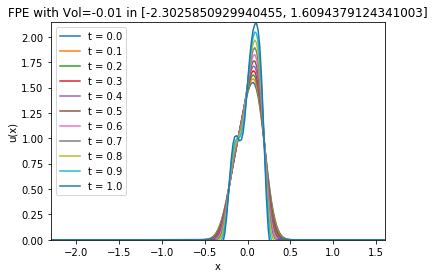

In [83]:
p_0,xx = solve_fpe_back(m,20,T,sigma,x_a,x_b,p_t)

Text(0.5,1,u'Max Pointwise Error = 0.7873266103907435')

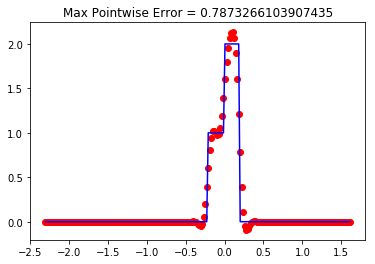

In [84]:
plt.plot(xx,p_0,'ro')
plt.plot(xx,u_0,'b')
plt.title('Max Pointwise Error = '+str(max(abs(p_0-u_0))))

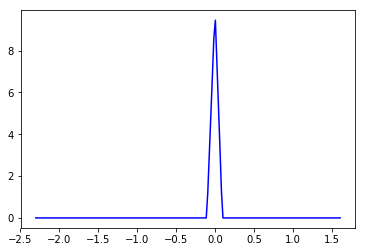

In [68]:
#BS test 2
r = 0.05
T = 1.0
K = 100.0
dK = 10
d = [1.0,-2.0,1.0]
sigma = 0.1
S_a = 10
S_b = 500
m=200
n=1000
x_a = X(S_a,K,0)
x_b = X(S_b,K,0)
xx = np.linspace(x_a, x_b, m+1)
x_k = X(K-dK,K,0)
x_k1 = X(K,K,0)
x_k2 = X(K+dK,K,0)
u_0 = []
for x in xx:
    v = 0.0
    if x>=x_k:
        v+=d[0]*(S(x,K,0)-K+dK)
    if x>=x_k1:
        v+=d[1]*(S(x,K,0)-K)
    if x>=x_k2:
        v+=d[2]*(S(x,K,0)-K-dK)
    u_0.append(v)
u_0 = np.array(u_0)
plt.plot(xx,u_0,'b')

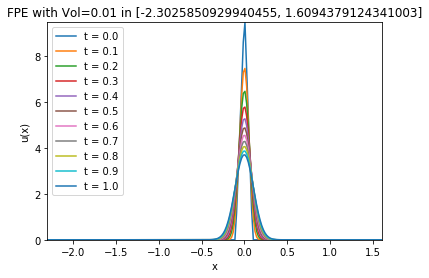

In [69]:
p_t,xx = solve_fpe(m,n,T,sigma,x_a,x_b,u_0)

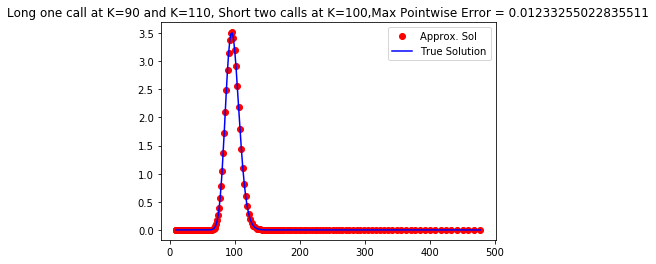

In [70]:
V_t = p_t*np.exp(-r*T)
S_t = np.array([S(x,K,T) for x in xx])
true_V = d[0]*np.array([call_price(s,K-dK,r,T,sigma) for s in S_t])
true_V+=d[1]*np.array([call_price(s,K,r,T,sigma) for s in S_t])
true_V+=d[2]*np.array([call_price(s,K+dK,r,T,sigma) for s in S_t])
plt.plot(S_t,V_t,'ro',label='Approx. Sol')
plt.plot(S_t, true_V,'b',label='True Solution')
plt.title('Long one call at K=90 and K=110, Short two calls at K=100,Max Pointwise Error = '+str(max(abs(true_V-V_t))))
plt.legend()

Time 0.1 probability total = 1.0028490825468688
Time 0.2 probability total = 1.002849082546869
Time 0.3 probability total = 1.002849082546869
Time 0.4 probability total = 1.0028490825468683
Time 0.5 probability total = 1.002849082546868
Time 0.6 probability total = 1.0028490825468686
Time 0.7 probability total = 1.002849082546869
Time 0.8 probability total = 1.0028490825468686
Time 0.9 probability total = 1.0028490825468686
Time 1.0 probability total = 1.002849082546868


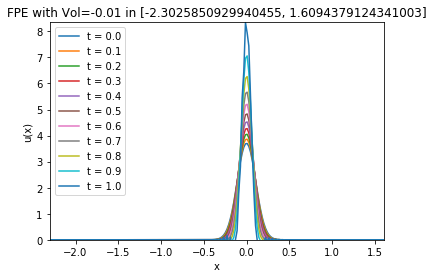

In [78]:
p_0,xx = solve_fpe_back(m,50,T,sigma,x_a,x_b,p_t)

Text(0.5,1,u'Max Pointwise Error = 1.5040543057564948')

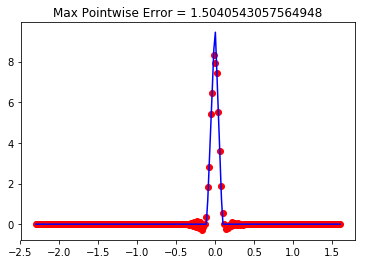

In [79]:
plt.plot(xx,p_0,'ro')
plt.plot(xx,u_0,'b')
plt.title('Max Pointwise Error = '+str(max(abs(p_0-u_0))))

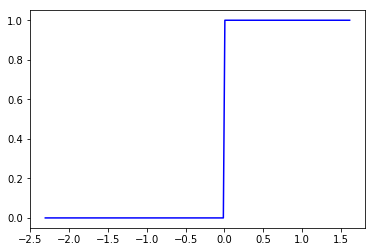

In [107]:
#BS test 2
r = 0.05
T = 1.0
K = 100.0
dK = 50
d = [1.0,0.0]
sigma = 0.1
S_a = 10
S_b = 500
m=200
n=1000
x_a = X(S_a,K,0)
x_b = X(S_b,K,0)
xx = np.linspace(x_a, x_b, m+1)
x_k = X(K,K,0)
x_k1 = X(K+dK,K,0)
u_0 = []
for x in xx:
    v = 0.0
    if x>=x_k:
        v+=d[0]
    if x>=x_k1:
        v+=d[1]
    u_0.append(v)
u_0 = np.array(u_0)
plt.plot(xx,u_0,'b')

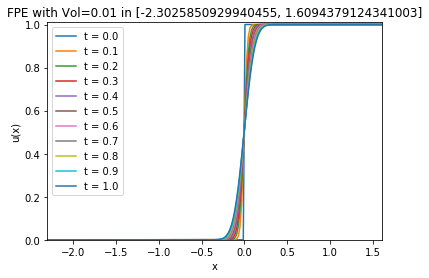

In [108]:
p_t,xx = solve_fpe(m,n,T,sigma,x_a,x_b,u_0,'fixed')

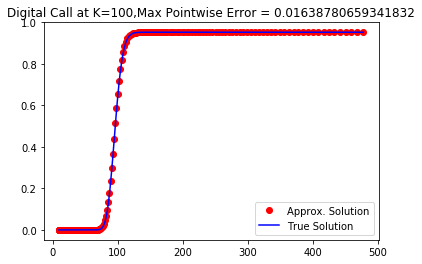

In [109]:
V_t = p_t*np.exp(-r*T)
S_t = np.array([S(x,K,T) for x in xx])
true_V = d[0]*np.array([np.exp(-r*T)*norm.cdf((np.log(s/(K))+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))) for s in S_t])
#true_V+=d[1]*np.array([np.exp(-r*T)*norm.cdf((np.log(s/(K+dK))+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))) for s in S_t])
plt.plot(S_t,V_t,'ro',label='Approx. Solution')
plt.plot(S_t, true_V,'b',label='True Solution')
plt.title('Digital Call at K=100,Max Pointwise Error = '+str(max(abs(true_V-V_t))))
plt.legend()

Time 0.1 probability total = 1.6234895472526802
Time 0.2 probability total = 1.6234895472526807
Time 0.3 probability total = 1.6234895472526807
Time 0.4 probability total = 1.6234895472526798
Time 0.5 probability total = 1.6234895472526802
Time 0.6 probability total = 1.6234895472526802
Time 0.7 probability total = 1.623489547252681
Time 0.8 probability total = 1.62348954725268
Time 0.9 probability total = 1.62348954725268
Time 1.0 probability total = 1.6234895472526807


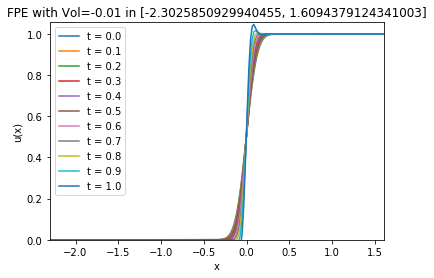

In [110]:
p_0,xx = solve_fpe_back(m,30,T,sigma,x_a,x_b,p_t)

Text(0.5,1,u'Max Pointwise Error = 0.3816616701953944')

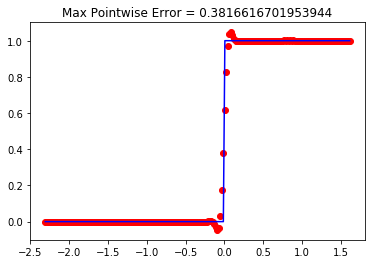

In [111]:
plt.plot(xx,p_0,'ro')
plt.plot(xx,u_0,'b')
plt.title('Max Pointwise Error = '+str(max(abs(p_0-u_0))))

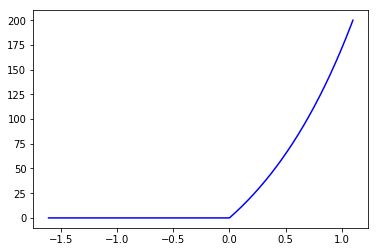

In [103]:
#BS test 4
r = 0.05
T = 1.0
K = 100.0
sigma = 0.1
S_a = 20
S_b =300
m=400
n=1000
x_a = X(S_a,K,0)
x_b = X(S_b,K,0)
xx = np.linspace(x_a, x_b, m+1)
x_k = X(K,K,0)
u_0 = []
for x in xx:
    v = 0.0
    if x>=x_k:
        v+=S(x,K,0)-K
    u_0.append(v)
u_0 = np.array(u_0)
plt.plot(xx,u_0,'b')

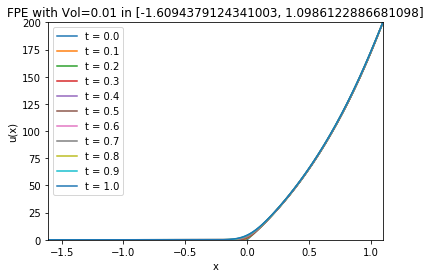

In [104]:
p_t,xx = solve_fpe(m,n,T,sigma,x_a,x_b,u_0,"fixed")

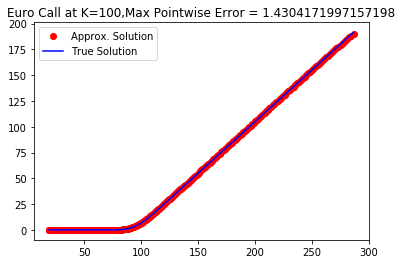

In [105]:
V_t = p_t*np.exp(-r*T)
S_t = np.array([S(x,K,T) for x in xx])
true_V =np.array([call_price(s,K,r,T,sigma) for s in S_t])
plt.plot(S_t,V_t,'ro',label='Approx. Solution')
plt.plot(S_t, true_V,'b',label='True Solution')
plt.title('Euro Call at K=100,Max Pointwise Error = '+str(max(abs(true_V-V_t))))
plt.legend()

In [106]:
V_t,true_V,S_t

(array([0.00000000e+00, 8.16248145e-57, 2.58607127e-56, 7.35744857e-56,
        2.06006029e-55, 5.73672506e-55, 1.59089441e-54, 4.39420911e-54,
        1.20889803e-53, 3.31259332e-53, 9.04097011e-53, 2.45770212e-52,
        6.65441039e-52, 1.79454710e-51, 4.82018718e-51, 1.28954209e-50,
        3.43612168e-50, 9.11930522e-50, 2.41053801e-49, 6.34635032e-49,
        1.66414334e-48, 4.34623158e-48, 1.13054861e-47, 2.92899525e-47,
        7.55787924e-47, 1.94236966e-46, 4.97179579e-46, 1.26748532e-45,
        3.21824908e-45, 8.13845991e-45, 2.04979043e-44, 5.14185889e-44,
        1.28461534e-43, 3.19644406e-43, 7.92138219e-43, 1.95512028e-42,
        4.80599644e-42, 1.17660221e-41, 2.86887039e-41, 6.96668297e-41,
        1.68489880e-40, 4.05838315e-40, 9.73559567e-40, 2.32595374e-39,
        5.53436097e-39, 1.31147665e-38, 3.09513162e-38, 7.27481528e-38,
        1.70289518e-37, 3.96986534e-37, 9.21688905e-37, 2.13114248e-36,
        4.90748492e-36, 1.12544077e-35, 2.57040951e-35, 5.846511

Time 0.1 probability total = 32.699076448371024
Time 0.2 probability total = 32.606098152185204
Time 0.3 probability total = 32.512727124770684
Time 0.4 probability total = 32.418934630264374
Time 0.5 probability total = 32.32468550126046
Time 0.6 probability total = 32.22993540921203
Time 0.7 probability total = 32.13462626364204
Time 0.8 probability total = 32.03867797084864
Time 0.9 probability total = 31.941976449477885
Time 1.0 probability total = 31.844468681438954


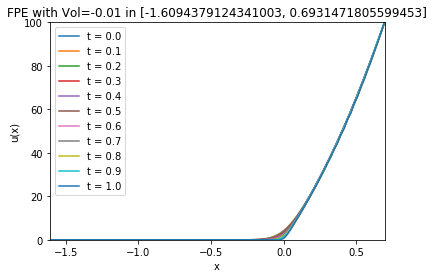

In [61]:
p_0,xx = solve_fpe_back(m,100,T,sigma,x_a,x_b,p_t)

Text(0.5,1,u'Max Pointwise Error = 0.5381047583879839')

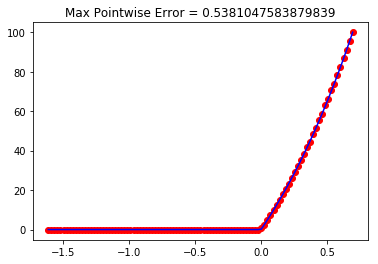

In [62]:
plt.plot(xx,p_0,'ro')
plt.plot(xx,u_0,'b')
plt.title('Max Pointwise Error = '+str(max(abs(p_0-u_0))))

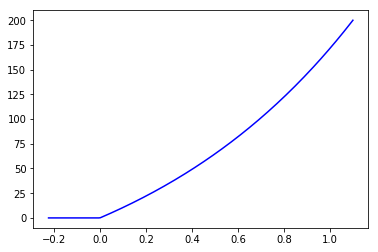

In [75]:
#BS test 6
r = 0.05
T = 0.5
K = 100.0
sigma = 0.2
H = 80
S_a = H
S_b =300
m=200
n=1000
x_a = X(S_a,K,0)
x_b = X(S_b,K,0)
xx = np.linspace(x_a, x_b, m+1)
x_k = X(K,K,0)
u_0 = []
for x in xx:
    v = 0.0
    if x>=x_k:
        v+=S(x,K,0)-K
    u_0.append(v)
u_0 = np.array(u_0)
u_0[0] = 0
plt.plot(xx,u_0,'b')

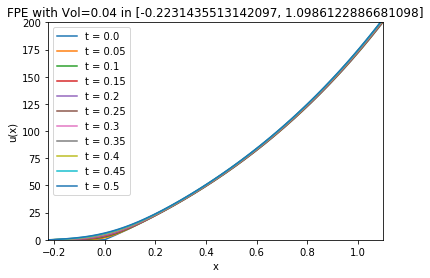

In [76]:
p_t,xx = solve_fpe(m,n,T,sigma,x_a,x_b,u_0,"zero")

In [77]:
def b_call_price(S,K,H,r,T,sigma):
    d1=(np.log(S/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2=(np.log(S/K)+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    c_1 = S*norm.cdf(d1)-K*norm.cdf(d2)*np.exp(-r*T)
    S_new = H*H/S
    d1=(np.log(S_new/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2=(np.log(S_new/K)+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    c_2 = S_new*norm.cdf(d1)-K*norm.cdf(d2)*np.exp(-r*T)
    const = (H/S)**(2*r/sigma**2-1)
    if S>H:
        return c_1-const*c_2
    else:
        return 0

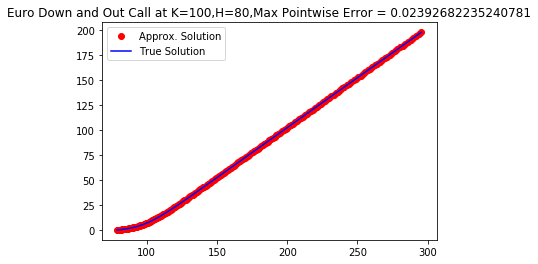

In [78]:
V_t = p_t*np.exp(-r*T)
S_t = np.array([S(x,K,T) for x in xx])
true_V =np.array([b_call_price(s,K,H,r,T,sigma) for s in S_t])
plt.plot(S_t,V_t,'ro',label='Approx. Solution')
plt.plot(S_t, true_V,'b',label='True Solution')
plt.title('Euro Down and Out Call at K=100,H=80,Max Pointwise Error = '+str(max(abs(true_V-V_t))))
plt.legend()

In [68]:
V_t,S_t,true_V

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.78201267e-02,
        1.96148103e-01, 2.95497409e-01, 3.96392170e-01, 4.99371018e-01,
        6.04989411e-01, 7.13820191e-01, 8.26452381e-01, 9.43488406e-01,
        1.06554004e+00, 1.19322351e+00, 1.32715423e+00, 1.46794152e+00,
        1.61618374e+00, 1.77246402e+00, 1.93734676e+00, 2.11137496e+00,
        2.29506823e+00, 2.48892156e+00, 2.69340447e+00, 2.90896059e+00,
        3.13600744e+00, 3.37493630e+00, 3.62611213e+00, 3.88987346e+00,
        4.16653220e+00, 4.45637342e+00, 4.75965514e+00, 5.07660802e+00,
        5.40743516e+00, 5.75231189e+00, 6.11138564e+00, 6.48477594e+00,
        6.87257451e+00, 7.27484548e+00, 7.69162571e+00, 8.12292535e+00,
        8.56872843e+00, 9.02899365e+00, 9.50365530e+00, 9.99262426e+00,
        1.04957892e+01, 1.10130179e+01, 1.15441583e+01, 1.20890405e+01,
        1.26474777e+01, 1.32192681e+01, 1.38041965e+01, 1.44020359e+01,
        1.50125490e+01, 1.56354902e+01, 1.62706070e+01, 1.691764